 
# smtpredwMtSBLUP

**SMTpred** is a program that combines SNP effects or individual scores from multiple traits according to their sample size, SNP-heritability (h2), and genetic correlation (rG), to create more accurate polygenic risk scores.

For more information, visit the [SMTpred GitHub repository](https://github.com/uqrmaie1/smtpred).


Clone the repository:

```bash
git clone https://github.com/uqrmaie1/smtpred.git
```

## Basic Working of smtpred-wMtSBLUP

The following text is based on my understanding of the tutorial provided in the smtpred GitHub repository.

1. **smtpred** is a multi-trait based PRS prediction software, and it requires the GWAS from multiple traits, as well as the heritability calculated from LDSC.

2. First, convert the GWAS effect sizes to SBLUP effects using GCTA for all GWAS.

Update the following parameters in the code:

- `lambda_value = 5000000`
- `cojo_window = 2000`
- `thread_num = 20`

3. Use LDSC to calculate heritability for all GWAS generated using GCTA.

4. Pass the output of the LDSC to smtpred to calculate the weighted betas.
5.  Use Plink to calculate the PRS.

**Note:** For the sake of simplicity, we considered two GWAS where the first and second GWAS are the same. However, it is generally better to include GWAS from related phenotypes to the one you are trying to predict.


### LDSC Installation

smtpred also requires LDSC. Download it using:

```bash
cd smtpred
git clone https://github.com/bulik/ldsc
```

After cloning, you should have the following directory structure in smtpred:

```
data  gcta  ldsc  ldsc_wrapper.py  README.md  smtpred.py
```


Once these steps are complete, copy the all files in smtpred folder and ldsc to the working directory/

```bash
cd smtpred/

cp * ../

cd ldsc

cp * ../

```

#### Download LDSC file

Download the LDSC files required for heritability calculation and store them in the `LDSCFILES/` directory.

1. **w_hm3.snplist.bz2**

   Download from: [w_hm3.snplist.bz2](https://console.cloud.google.com/storage/browser/_details/broad-alkesgroup-public-requester-pays/LDSCORE/w_hm3.snplist.bz2;tab=live_object?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22)))

2. **baselineLD**

   Download from: [baselineLD](https://console.cloud.google.com/storage/browser/broad-alkesgroup-public-requester-pays/LDSCORE/baselineLD_v1.1_hg38_annots?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22)))

Ensure that you store the downloaded files in the `LDSCFILES/` directory.


It should have the following files.

```
.
├── baseline
│   ├── baselineLD.10.annot.gz
│   ├── baselineLD.10.l2.ldscore.gz
│   ├── baselineLD.10.l2.M
│   ├── baselineLD.10.l2.M_5_50
│   ├── baselineLD.10.log
│   ├── baselineLD.11.annot.gz
│   ├── baselineLD.11.l2.ldscore.gz
│   ├── baselineLD.11.l2.M
│   ├── baselineLD.11.l2.M_5_50
│   ├── baselineLD.11.log
│   ├── baselineLD.12.annot.gz
│   ├── baselineLD.12.l2.ldscore.gz
│   ├── baselineLD.12.l2.M
│   ├── baselineLD.12.l2.M_5_50
│   ├── baselineLD.12.log
│   ├── baselineLD.13.annot.gz
│   ├── baselineLD.13.l2.ldscore.gz
│   ├── baselineLD.13.l2.M
│   ├── baselineLD.13.l2.M_5_50
│   ├── baselineLD.13.log
│   ├── baselineLD.14.annot.gz
│   ├── baselineLD.14.l2.ldscore.gz
│   ├── baselineLD.14.l2.M
│   ├── baselineLD.14.l2.M_5_50
│   ├── baselineLD.14.log
│   ├── baselineLD.15.annot.gz
│   ├── baselineLD.15.l2.ldscore.gz
│   ├── baselineLD.15.l2.M
│   ├── baselineLD.15.l2.M_5_50
│   ├── baselineLD.15.log
│   ├── baselineLD.16.annot.gz
│   ├── baselineLD.16.l2.ldscore.gz
│   ├── baselineLD.16.l2.M
│   ├── baselineLD.16.l2.M_5_50
│   ├── baselineLD.16.log
│   ├── baselineLD.17.annot.gz
│   ├── baselineLD.17.l2.ldscore.gz
│   ├── baselineLD.17.l2.M
│   ├── baselineLD.17.l2.M_5_50
│   ├── baselineLD.17.log
│   ├── baselineLD.18.annot.gz
│   ├── baselineLD.18.l2.ldscore.gz
│   ├── baselineLD.18.l2.M
│   ├── baselineLD.18.l2.M_5_50
│   ├── baselineLD.18.log
│   ├── baselineLD.19.annot.gz
│   ├── baselineLD.19.l2.ldscore.gz
│   ├── baselineLD.19.l2.M
│   ├── baselineLD.19.l2.M_5_50
│   ├── baselineLD.19.log
│   ├── baselineLD.1.annot.gz
│   ├── baselineLD.1.l2.ldscore.gz
│   ├── baselineLD.1.l2.M
│   ├── baselineLD.1.l2.M_5_50
│   ├── baselineLD.1.log
│   ├── baselineLD.20.annot.gz
│   ├── baselineLD.20.l2.ldscore.gz
│   ├── baselineLD.20.l2.M
│   ├── baselineLD.20.l2.M_5_50
│   ├── baselineLD.20.log
│   ├── baselineLD.21.annot.gz
│   ├── baselineLD.21.l2.ldscore.gz
│   ├── baselineLD.21.l2.M
│   ├── baselineLD.21.l2.M_5_50
│   ├── baselineLD.21.log
│   ├── baselineLD.22.annot.gz
│   ├── baselineLD.22.l2.ldscore.gz
│   ├── baselineLD.22.l2.M
│   ├── baselineLD.22.l2.M_5_50
│   ├── baselineLD.22.log
│   ├── baselineLD.2.annot.gz
│   ├── baselineLD.2.l2.ldscore.gz
│   ├── baselineLD.2.l2.M
│   ├── baselineLD.2.l2.M_5_50
│   ├── baselineLD.2.log
│   ├── baselineLD.3.annot.gz
│   ├── baselineLD.3.l2.ldscore.gz
│   ├── baselineLD.3.l2.M
│   ├── baselineLD.3.l2.M_5_50
│   ├── baselineLD.3.log
│   ├── baselineLD.4.annot.gz
│   ├── baselineLD.4.l2.ldscore.gz
│   ├── baselineLD.4.l2.M
│   ├── baselineLD.4.l2.M_5_50
│   ├── baselineLD.4.log
│   ├── baselineLD.5.annot.gz
│   ├── baselineLD.5.l2.ldscore.gz
│   ├── baselineLD.5.l2.M
│   ├── baselineLD.5.l2.M_5_50
│   ├── baselineLD.5.log
│   ├── baselineLD.6.annot.gz
│   ├── baselineLD.6.l2.ldscore.gz
│   ├── baselineLD.6.l2.M
│   ├── baselineLD.6.l2.M_5_50
│   ├── baselineLD.6.log
│   ├── baselineLD.7.annot.gz
│   ├── baselineLD.7.l2.ldscore.gz
│   ├── baselineLD.7.l2.M
│   ├── baselineLD.7.l2.M_5_50
│   ├── baselineLD.7.log
│   ├── baselineLD.8.annot.gz
│   ├── baselineLD.8.l2.ldscore.gz
│   ├── baselineLD.8.l2.M
│   ├── baselineLD.8.l2.M_5_50
│   ├── baselineLD.8.log
│   ├── baselineLD.9.annot.gz
│   ├── baselineLD.9.l2.ldscore.gz
│   ├── baselineLD.9.l2.M
│   ├── baselineLD.9.l2.M_5_50
│   └── baselineLD.9.log
├── freq
│   ├── 1000G.EUR.QC.10.frq
│   ├── 1000G.EUR.QC.11.frq
│   ├── 1000G.EUR.QC.12.frq
│   ├── 1000G.EUR.QC.13.frq
│   ├── 1000G.EUR.QC.14.frq
│   ├── 1000G.EUR.QC.15.frq
│   ├── 1000G.EUR.QC.16.frq
│   ├── 1000G.EUR.QC.17.frq
│   ├── 1000G.EUR.QC.18.frq
│   ├── 1000G.EUR.QC.19.frq
│   ├── 1000G.EUR.QC.1.frq
│   ├── 1000G.EUR.QC.20.frq
│   ├── 1000G.EUR.QC.21.frq
│   ├── 1000G.EUR.QC.22.frq
│   ├── 1000G.EUR.QC.2.frq
│   ├── 1000G.EUR.QC.3.frq
│   ├── 1000G.EUR.QC.4.frq
│   ├── 1000G.EUR.QC.5.frq
│   ├── 1000G.EUR.QC.6.frq
│   ├── 1000G.EUR.QC.7.frq
│   ├── 1000G.EUR.QC.8.frq
│   └── 1000G.EUR.QC.9.frq
├── weights
│   ├── weights.10.l2.ldscore.gz
│   ├── weights.11.l2.ldscore.gz
│   ├── weights.12.l2.ldscore.gz
│   ├── weights.13.l2.ldscore.gz
│   ├── weights.14.l2.ldscore.gz
│   ├── weights.15.l2.ldscore.gz
│   ├── weights.16.l2.ldscore.gz
│   ├── weights.17.l2.ldscore.gz
│   ├── weights.18.l2.ldscore.gz
│   ├── weights.19.l2.ldscore.gz
│   ├── weights.1.l2.ldscore.gz
│   ├── weights.20.l2.ldscore.gz
│   ├── weights.21.l2.ldscore.gz
│   ├── weights.22.l2.ldscore.gz
│   ├── weights.2.l2.ldscore.gz
│   ├── weights.3.l2.ldscore.gz
│   ├── weights.4.l2.ldscore.gz
│   ├── weights.5.l2.ldscore.gz
│   ├── weights.6.l2.ldscore.gz
│   ├── weights.7.l2.ldscore.gz
│   ├── weights.8.l2.ldscore.gz
│   └── weights.9.l2.ldscore.gz
└── w_hm3.snplist.bz2

3 directories, 155 files
```

### GCTA Installation

**Note:** GCTA needs to be installed or placed in the same directory as this notebook.

1. It can be downloaded from this link: [GCTA](https://yanglab.westlake.edu.cn/software/gcta/#Download).


### smtpred

SMTpred uses polygenic scores of multiple traits or Betas for multiple traits. To run SMTpred, use the following command:

```bash
python smtpred.py \
  --h2 0.5 0.5 0.5 \
  --rg 0.5 0.5 0.5 \
  --n 1e5 1e5 1e5 \
  --scorefiles data/individual_scores/OLS/traitA.profile \
               data/individual_scores/OLS/traitB.profile \
               data/individual_scores/OLS/traitC.profile \
  --out data/individual_scores/wMT-OLS/
```

 
| Parameter       | Name           | Description                                                                 | Sample Value                                      |
|-----------------|----------------|-----------------------------------------------------------------------------|---------------------------------------------------|
| `--h2`          | SNP-heritability | SNP-heritability estimates for each trait.                                  | `0.5 0.5 0.5`                                    |
| `--rg`          | Genetic correlation | Genetic correlation estimates for each trait.                              | `0.5 0.5 0.5`                                    |
| `--n`           | Sample size    | Number of samples for each trait.                                            | `1e5 1e5 1e5`                                    |
| `--scorefiles`  | Score files    | Paths to the score files for each trait.                                    | `data/individual_scores/OLS/traitA.profile`      |
| `--out`         | Output directory | Output directory for the SNP weights.                                        | `data/individual_scores/wMT-OLS/`                |

**Note**: The `h2` and `rg` for each trait can be estimated using LDSC and the GWAS file for each trait. In this tutorial, we will use the same data for two traits, and one file can be replaced for that dataset. SMTpred uses Betas/individual scores from multiple GWAS and weights them based on `h2`, `rg`, and `n` to create a stronger polygenic score.

 
### SNP Effect Files
Weighting is performed on SNP effects if the option `--betafiles` or `--betapath` is specified. SNP effect files for each trait must be in the same format and must have a header line with three required fields:
- **SNP ID** (called `snp`, `snpid`, `rs`, `rsid`; case insensitive)
- **Effect Allele** (called `a1`; case insensitive)
- **SNP Effect** (called `beta` or `b`; case insensitive)

SNP IDs will be matched on their ID and effect allele `a1`, and optionally on `a2` if it exists. `a1` (and `a2`) must match exactly among traits; otherwise, the SNP will not be used.

For disease traits with odds ratios, beta values can be calculated as `log(odds ratio)`.

- `--betapath` assumes that all files in this directory are PLINK score files.
- `--betafiles` should be followed by space-separated file names (`--betafiles trait1.txt trait2.txt`).

### Score Files
Weighting is performed on individual scores if the option `--scorefiles` or `--scorepath` is specified. Score files must be in the format of the output of PLINK `--score` (.profile files).

- `--scorepath` assumes that all files in this directory are PLINK score files.
- `--scorefiles` should be followed by space-separated file names (`--scorefiles trait1.profile trait2.profile`).

## Possible Issues
1. If a limited number of variants exist in both GWAS, the code may not work. For some phenotypes, the common SNPs and the SNPs after preprocessing from the tools were about 100, so the code did not work due to the limited number of variants.
2. It requires Python 2 because LDscore (ldsc) requires Python 2.
 

## GWAS File Processing for smtpred 

1. Convert Odds Ratios (OR) for binary phenotypes to Betas.
2. Convert the newly generated Betas back to OR using `np.log`.
3. OLS effects are the default effects of the GWAS, SBLUP, and those generated by GCTA.


In [6]:
import os
import pandas as pd
import numpy as np
import sys

#filedirec = sys.argv[1]

filedirec = "SampleData1"
#filedirec = "asthma_19"
#filedirec = "migraine_0"

def check_phenotype_is_binary_or_continous(filedirec):
    # Read the processed quality controlled file for a phenotype
    df = pd.read_csv(filedirec+os.sep+filedirec+'_QC.fam',sep="\s+",header=None)
    column_values = df[5].unique()
 
    if len(set(column_values)) == 2:
        return "Binary"
    else:
        return "Continous"



# Read the GWAS file.
GWAS = filedirec + os.sep + filedirec+".gz"
df = pd.read_csv(GWAS,compression= "gzip",sep="\s+")
 
if "BETA" in df.columns.to_list():
    # For Binary Phenotypes.
    
    df = df[['CHR', 'BP', 'SNP', 'A1', 'A2', 'N', 'SE', 'P', 'BETA', 'INFO', 'MAF']]

else:
    df["BETA"] = np.log(df["OR"])
    # For Binary Phenotype.
    df = df[['CHR', 'BP', 'SNP', 'A1', 'A2', 'N', 'SE', 'P', 'BETA', 'INFO', 'MAF']]
  
    
df_transformed = df[['SNP', 'A1', 'A2', 'MAF', 'BETA', 'SE', 'P', 'N']]
df_transformed.rename(columns={
    'MAF': 'freq',
    'BETA': 'b',
    'SE':'se',
    'P':'p' 
    
}, inplace=True)
  

print(df_transformed.head())

df_transformed.to_csv(filedirec + os.sep +"smtpred-OLS.txt",sep="\t",index=False)
 


          SNP A1 A2      freq         b        se         p       N
0   rs3131962  A  G  0.369390 -0.002115  0.003017  0.483171  388028
1  rs12562034  A  G  0.336846  0.000687  0.003295  0.834808  388028
2   rs4040617  G  A  0.377368 -0.002399  0.003033  0.428970  388028
3  rs79373928  G  T  0.483212  0.002034  0.008413  0.808999  388028
4  rs11240779  G  A  0.450410  0.001307  0.002428  0.590265  388028


### Define Hyperparameters

Define hyperparameters to be optimized and set initial values.

### Extract Valid SNPs from Clumped File

For Windows, download `gwak`, and for Linux, the `awk` command is sufficient. For Windows, `GWAK` is required. You can download it from [here](https://sourceforge.net/projects/gnuwin32/). Get it and place it in the same directory.


### Execution Path

At this stage, we have the genotype training data `newtrainfilename = "train_data.QC"` and genotype test data `newtestfilename = "test_data.QC"`.

We modified the following variables:

1. `filedirec = "SampleData1"` or `filedirec = sys.argv[1]`
2. `foldnumber = "0"` or `foldnumber = sys.argv[2]` for HPC.

Only these two variables can be modified to execute the code for specific data and specific folds. Though the code can be executed separately for each fold on HPC and separately for each dataset, it is recommended to execute it for multiple diseases and one fold at a time.
Here’s the corrected text in Markdown format:

 
### P-values

PRS calculation relies on P-values. SNPs with low P-values, indicating a high degree of association with a specific trait, are considered for calculation.

You can modify the code below to consider a specific set of P-values and save the file in the same format.

We considered the following parameters:

- **Minimum P-value**: `1e-10`
- **Maximum P-value**: `1.0`
- **Minimum exponent**: `10`  (Minimum P-value in exponent)
- **Number of intervals**: `100`  (Number of intervals to be considered)

The code generates an array of logarithmically spaced P-values:

```python
import numpy as np
import os

minimumpvalue = 10  # Minimum exponent for P-values
numberofintervals = 100  # Number of intervals to be considered

allpvalues = np.logspace(-minimumpvalue, 0, numberofintervals, endpoint=True)  # Generating an array of logarithmically spaced P-values

print("Minimum P-value:", allpvalues[0])
print("Maximum P-value:", allpvalues[-1])

count = 1
with open(os.path.join(folddirec, 'range_list'), 'w') as file:
    for value in allpvalues:
        file.write(f'pv_{value} 0 {value}\n')  # Writing range information to the 'range_list' file
        count += 1

pvaluefile = os.path.join(folddirec, 'range_list')
```

In this code:
- `minimumpvalue` defines the minimum exponent for P-values.
- `numberofintervals` specifies how many intervals to consider.
- `allpvalues` generates an array of P-values spaced logarithmically.
- The script writes these P-values to a file named `range_list` in the specified directory.
 

In [7]:
from operator import index
import pandas as pd
import numpy as np
import os
import subprocess
import sys
import pandas as pd
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar

def create_directory(directory):
    """Function to create a directory if it doesn't exist."""
    if not os.path.exists(directory):  # Checking if the directory doesn't exist
        os.makedirs(directory)  # Creating the directory if it doesn't exist
    return directory  # Returning the created or existing directory

 
#foldnumber = sys.argv[1]
foldnumber = "0"  # Setting 'foldnumber' to "0"

folddirec = filedirec + os.sep + "Fold_" + foldnumber  # Creating a directory path for the specific fold
trainfilename = "train_data"  # Setting the name of the training data file
newtrainfilename = "train_data.QC"  # Setting the name of the new training data file

testfilename = "test_data"  # Setting the name of the test data file
newtestfilename = "test_data.QC"  # Setting the name of the new test data file

# Number of PCA to be included as a covariate.
numberofpca = ["6"]  # Setting the number of PCA components to be included

# Clumping parameters.
clump_p1 = [1]  # List containing clump parameter 'p1'
clump_r2 = [0.1]  # List containing clump parameter 'r2'
clump_kb = [200]  # List containing clump parameter 'kb'

# Pruning parameters.
p_window_size = [200]  # List containing pruning parameter 'window_size'
p_slide_size = [50]  # List containing pruning parameter 'slide_size'
p_LD_threshold = [0.25]  # List containing pruning parameter 'LD_threshold'

# Kindly note that the number of p-values to be considered varies, and the actual p-value depends on the dataset as well.
# We will specify the range list here.
#folddirec = "/path/to/your/folder"  # Replace with your actual folder path
from decimal import Decimal, getcontext
import numpy as np

# Set precision to a high value (e.g., 50)
getcontext().prec = 50
minimumpvalue = 10  # Minimum p-value in exponent
numberofintervals = 20  # Number of intervals to be considered
allpvalues = np.logspace(-minimumpvalue, 0, numberofintervals, endpoint=True)  # Generating an array of logarithmically spaced p-values
count = 1
with open(os.path.join(folddirec, 'range_list'), 'w') as file:
    for value in allpvalues:
        
        file.write('pv_{} 0 {}\n'.format(value, value))  # Writing range information to the 'range_list' file
        count = count + 1

pvaluefile = folddirec + os.sep + 'range_list'

# Initializing an empty DataFrame with specified column names
 


### Define Helper Functions

1. **Perform Clumping and Pruning**
2. **Calculate PCA Using Plink**
3. **Fit Binary Phenotype and Save Results**
4. **Fit Continuous Phenotype and Save Results**


In [14]:
import os
import subprocess
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler


def perform_clumping_and_pruning_on_individual_data(traindirec, newtrainfilename,numberofpca, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    
    command = [
    "./plink",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--out", traindirec+os.sep+trainfilename
    ]
    subprocess.call(command)
    # First perform pruning and then clumping and the pruning.

    command = [
    "./plink",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--clump-p1", c1_val,
    "--extract", traindirec+os.sep+trainfilename+".prune.in",
    "--clump-r2", c2_val,
    "--clump-kb", c3_val,
    "--clump", filedirec+os.sep+filedirec+".txt",
    "--clump-snp-field", "SNP",
    "--clump-field", "P",
    "--out", traindirec+os.sep+trainfilename
    ]    
    subprocess.call(command)

    # Extract the valid SNPs from th clumped file.
    # For windows download gwak for linux awk commmand is sufficient.
    ### For windows require GWAK.
    ### https://sourceforge.net/projects/gnuwin32/
    ##3 Get it and place it in the same direc.
    #os.system("gawk "+"\""+"NR!=1{print $3}"+"\"  "+ traindirec+os.sep+trainfilename+".clumped >  "+traindirec+os.sep+trainfilename+".valid.snp")
    #print("gawk "+"\""+"NR!=1{print $3}"+"\"  "+ traindirec+os.sep+trainfilename+".clumped >  "+traindirec+os.sep+trainfilename+".valid.snp")

    #Linux:
    command = "awk 'NR!=1{{print $3}}' {}{}{}.clumped > {}{}{}.valid.snp".format(
        traindirec, os.sep, trainfilename, 
        traindirec, os.sep, trainfilename
    )
 
    os.system(command)
  
    


    
    command = [
    "./plink",
    "--make-bed",
    "--bfile", traindirec+os.sep+newtrainfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--extract", traindirec+os.sep+trainfilename+".valid.snp",
    "--out", traindirec+os.sep+newtrainfilename+".clumped.pruned"
    ]
    subprocess.call(command)
    
    command = [
    "./plink",
    "--make-bed",
    "--bfile", traindirec+os.sep+testfilename,
    "--indep-pairwise", p1_val, p2_val, p3_val,
    "--extract", traindirec+os.sep+trainfilename+".valid.snp",
    "--out", traindirec+os.sep+testfilename+".clumped.pruned"
    ]
    subprocess.call(command)    
    
    
 
def calculate_pca_for_traindata_testdata_for_clumped_pruned_snps(traindirec, newtrainfilename,p):
    
    # Calculate the PRS for the test data using the same set of SNPs and also calculate the PCA.


    # Also extract the PCA at this point.
    # PCA are calculated afer clumping and pruining.
    command = [
        "./plink",
        "--bfile", folddirec+os.sep+testfilename+".clumped.pruned",
        # Select the final variants after clumping and pruning.
        "--extract", traindirec+os.sep+trainfilename+".valid.snp",
        "--pca", p,
        "--out", folddirec+os.sep+testfilename
    ]
    subprocess.call(command)


    command = [
    "./plink",
        "--bfile", traindirec+os.sep+newtrainfilename+".clumped.pruned",
        # Select the final variants after clumping and pruning.        
        "--extract", traindirec+os.sep+trainfilename+".valid.snp",
        "--pca", p,
        "--out", traindirec+os.sep+trainfilename
    ]
    subprocess.call(command)
    
    
def fit_binary_phenotype_on_PRS(traindirec, newtrainfilename, p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val, Name, pvaluefile):
    threshold_values = allpvalues

    # Merge the covariates, PCA and phenotypes.
    tempphenotype_train = pd.read_table(os.path.join(traindirec, newtrainfilename + ".clumped.pruned.fam"), sep="\s+", header=None)
    phenotype_train = pd.DataFrame()
    phenotype_train["Phenotype"] = tempphenotype_train[5].values
    pcs_train = pd.read_table(os.path.join(traindirec, trainfilename + ".eigenvec"), sep="\s+", header=None, names=["FID", "IID"] + ["PC" + str(i) for i in range(1, int(p) + 1)])
    covariate_train = pd.read_table(os.path.join(traindirec, trainfilename + ".cov"), sep="\s+")
    covariate_train.fillna(0, inplace=True)
    covariate_train = covariate_train[covariate_train["FID"].isin(pcs_train["FID"].values) & covariate_train["IID"].isin(pcs_train["IID"].values)]
    covariate_train['FID'] = covariate_train['FID'].astype(str)
    pcs_train['FID'] = pcs_train['FID'].astype(str)
    covariate_train['IID'] = covariate_train['IID'].astype(str)
    pcs_train['IID'] = pcs_train['IID'].astype(str)
    covandpcs_train = pd.merge(covariate_train, pcs_train, on=["FID", "IID"])
    covandpcs_train.fillna(0, inplace=True)

    # Scale the covariates
    scaler = MinMaxScaler()
    normalized_values_train = scaler.fit_transform(covandpcs_train.iloc[:, 2:])

    tempphenotype_test = pd.read_table(os.path.join(traindirec, testfilename + ".clumped.pruned.fam"), sep="\s+", header=None)
    phenotype_test = pd.DataFrame()
    phenotype_test["Phenotype"] = tempphenotype_test[5].values
    pcs_test = pd.read_table(os.path.join(traindirec, testfilename + ".eigenvec"), sep="\s+", header=None, names=["FID", "IID"] + ["PC" + str(i) for i in range(1, int(p) + 1)])
    covariate_test = pd.read_table(os.path.join(traindirec, testfilename + ".cov"), sep="\s+")
    covariate_test.fillna(0, inplace=True)
    covariate_test = covariate_test[covariate_test["FID"].isin(pcs_test["FID"].values) & covariate_test["IID"].isin(pcs_test["IID"].values)]
    covariate_test['FID'] = covariate_test['FID'].astype(str)
    pcs_test['FID'] = pcs_test['FID'].astype(str)
    covariate_test['IID'] = covariate_test['IID'].astype(str)
    pcs_test['IID'] = pcs_test['IID'].astype(str)
    covandpcs_test = pd.merge(covariate_test, pcs_test, on=["FID", "IID"])
    covandpcs_test.fillna(0, inplace=True)
    normalized_values_test = scaler.transform(covandpcs_test.iloc[:, 2:])

    tempalphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    l1weights = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    tempalphas = [0.1]
    l1weights = [0.1]

    phenotype_train["Phenotype"] = phenotype_train["Phenotype"].replace({1: 0, 2: 1})
    phenotype_test["Phenotype"] = phenotype_test["Phenotype"].replace({1: 0, 2: 1})

    for tempalpha in tempalphas:
        for l1weight in l1weights:

            
            try:
                null_model =  sm.Logit(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                #null_model =  sm.Logit(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit()
            
            except:
                print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
                continue

            train_null_predicted = null_model.predict(sm.add_constant(covandpcs_train.iloc[:, 2:]))
            
            from sklearn.metrics import roc_auc_score, confusion_matrix
            from sklearn.metrics import r2_score
            
            test_null_predicted = null_model.predict(sm.add_constant(covandpcs_test.iloc[:, 2:]))
            
           
            
            global prs_result 
            for i in threshold_values:
                try:
                    prs_train = pd.read_table(
                        traindirec + os.sep + Name + os.sep + "train_data.pv_{}.profile".format(i),
                        sep="\s+",
                        usecols=["FID", "IID", "SCORE"]
                    )
                except:
                    continue

                prs_train['FID'] = prs_train['FID'].astype(str)
                prs_train['IID'] = prs_train['IID'].astype(str)
                try:
                    prs_test = pd.read_table(
                        traindirec + os.sep + Name + os.sep + "test_data.pv_{}.profile".format(i),
                        sep="\s+",
                        usecols=["FID", "IID", "SCORE"]
                    )
                
                except:
                    continue
                prs_test['FID'] = prs_test['FID'].astype(str)
                prs_test['IID'] = prs_test['IID'].astype(str)
                pheno_prs_train = pd.merge(covandpcs_train, prs_train, on=["FID", "IID"])
                pheno_prs_test = pd.merge(covandpcs_test, prs_test, on=["FID", "IID"])
        
                try:
                    model = sm.Logit(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                    #model = sm.Logit(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit()
                
                except:
                    continue


                
                train_best_predicted = model.predict(sm.add_constant(pheno_prs_train.iloc[:, 2:]))    
                test_best_predicted = model.predict(sm.add_constant(pheno_prs_test.iloc[:, 2:])) 

                prs_result = prs_result.append({
                    "clump_p1": c1_val,
                    "clump_r2": c2_val,
                    "clump_kb": c3_val,
                    "p_window_size": p1_val,
                    "p_slide_size": p2_val,
                    "p_LD_threshold": p3_val,
                    "pvalue": i,
                    "numberofpca": p,

                    "tempalpha": str(tempalpha),
                    "l1weight": str(l1weight),
                    
                    "Train_pure_prs": roc_auc_score(phenotype_train["Phenotype"].values, prs_train['SCORE'].values),
                    "Train_null_model": roc_auc_score(phenotype_train["Phenotype"].values, train_null_predicted),
                    "Train_best_model": roc_auc_score(phenotype_train["Phenotype"].values, train_best_predicted),

                    "Test_pure_prs": roc_auc_score(phenotype_test["Phenotype"].values, prs_test['SCORE'].values),
                    "Test_null_model": roc_auc_score(phenotype_test["Phenotype"].values, test_null_predicted),
                    "Test_best_model": roc_auc_score(phenotype_test["Phenotype"].values, test_best_predicted),

                }, ignore_index=True)

                prs_result.to_csv(os.path.join(traindirec, Name, "Results.csv"), index=False)

    return

# This function fits the continuous model on the PRS.
def fit_continous_phenotype_on_PRS(traindirec, newtrainfilename, p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val, Name, pvaluefile):
    threshold_values = allpvalues

    # Merge the covariates, PCA and phenotypes.
    tempphenotype_train = pd.read_table(os.path.join(traindirec, newtrainfilename + ".clumped.pruned.fam"), sep="\s+", header=None)
    phenotype_train = pd.DataFrame()
    phenotype_train["Phenotype"] = tempphenotype_train[5].values
    pcs_train = pd.read_table(os.path.join(traindirec, trainfilename + ".eigenvec"), sep="\s+", header=None, names=["FID", "IID"] + ["PC" + str(i) for i in range(1, int(p) + 1)])
    covariate_train = pd.read_table(os.path.join(traindirec, trainfilename + ".cov"), sep="\s+")
    covariate_train.fillna(0, inplace=True)
    covariate_train = covariate_train[covariate_train["FID"].isin(pcs_train["FID"].values) & covariate_train["IID"].isin(pcs_train["IID"].values)]
    covariate_train['FID'] = covariate_train['FID'].astype(str)
    pcs_train['FID'] = pcs_train['FID'].astype(str)
    covariate_train['IID'] = covariate_train['IID'].astype(str)
    pcs_train['IID'] = pcs_train['IID'].astype(str)
    covandpcs_train = pd.merge(covariate_train, pcs_train, on=["FID", "IID"])
    covandpcs_train.fillna(0, inplace=True)

    # Scale the covariates
    scaler = MinMaxScaler()
    normalized_values_train = scaler.fit_transform(covandpcs_train.iloc[:, 2:])

    tempphenotype_test = pd.read_table(os.path.join(traindirec, testfilename + ".clumped.pruned.fam"), sep="\s+", header=None)
    phenotype_test = pd.DataFrame()
    phenotype_test["Phenotype"] = tempphenotype_test[5].values
    pcs_test = pd.read_table(os.path.join(traindirec, testfilename + ".eigenvec"), sep="\s+", header=None, names=["FID", "IID"] + ["PC" + str(i) for i in range(1, int(p) + 1)])
    covariate_test = pd.read_table(os.path.join(traindirec, testfilename + ".cov"), sep="\s+")
    covariate_test.fillna(0, inplace=True)
    covariate_test = covariate_test[covariate_test["FID"].isin(pcs_test["FID"].values) & covariate_test["IID"].isin(pcs_test["IID"].values)]
    covariate_test['FID'] = covariate_test['FID'].astype(str)
    pcs_test['FID'] = pcs_test['FID'].astype(str)
    covariate_test['IID'] = covariate_test['IID'].astype(str)
    pcs_test['IID'] = pcs_test['IID'].astype(str)
    covandpcs_test = pd.merge(covariate_test, pcs_test, on=["FID", "IID"])
    covandpcs_test.fillna(0, inplace=True)
    normalized_values_test = scaler.transform(covandpcs_test.iloc[:, 2:])

    tempalphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    l1weights = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    tempalphas = [0.1]
    l1weights = [0.1]

    for tempalpha in tempalphas:
        for l1weight in l1weights:

            
            try:
                #null_model =  sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                null_model =  sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit()
                #null_model =  sm.OLS(phenotype_train["Phenotype"], sm.add_constant(covandpcs_train.iloc[:, 2:])).fit()
            except:
                print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
                continue

            train_null_predicted = null_model.predict(sm.add_constant(covandpcs_train.iloc[:, 2:]))
            
            from sklearn.metrics import roc_auc_score, confusion_matrix
            from sklearn.metrics import r2_score
            
            test_null_predicted = null_model.predict(sm.add_constant(covandpcs_test.iloc[:, 2:]))
            
            
            
            global prs_result 
            for i in threshold_values:
                try:
                    prs_train = pd.read_table(
                        traindirec + os.sep + Name + os.sep + "train_data.pv_{}.profile".format(i),
                        sep="\s+",
                        usecols=["FID", "IID", "SCORE"]
                    )
                except:
                    continue

                prs_train['FID'] = prs_train['FID'].astype(str)
                prs_train['IID'] = prs_train['IID'].astype(str)
                try:
                    prs_test = pd.read_table(
                        traindirec + os.sep + Name + os.sep + "test_data.pv_{}.profile".format(i),
                        sep="\s+",
                        usecols=["FID", "IID", "SCORE"]
                    )
                
                except:
                    continue
                prs_test['FID'] = prs_test['FID'].astype(str)
                prs_test['IID'] = prs_test['IID'].astype(str)
                pheno_prs_train = pd.merge(covandpcs_train, prs_train, on=["FID", "IID"])
                pheno_prs_test = pd.merge(covandpcs_test, prs_test, on=["FID", "IID"])
        
                try:
                    #model = sm.OLS(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit_regularized(alpha=tempalpha, L1_wt=l1weight)
                    model = sm.OLS(phenotype_train["Phenotype"], sm.add_constant(pheno_prs_train.iloc[:, 2:])).fit()
                
                except:
                    continue


                
                train_best_predicted = model.predict(sm.add_constant(pheno_prs_train.iloc[:, 2:]))    
                test_best_predicted = model.predict(sm.add_constant(pheno_prs_test.iloc[:, 2:]))

                prs_result = prs_result.append({
                    "clump_p1": c1_val,
                    "clump_r2": c2_val,
                    "clump_kb": c3_val,
                    "p_window_size": p1_val,
                    "p_slide_size": p2_val,
                    "p_LD_threshold": p3_val,
                    "pvalue": i,
                    "numberofpca": p,

                    "tempalpha": str(tempalpha),
                    "l1weight": str(l1weight),
                    
                    "Train_pure_prs": explained_variance_score(phenotype_train["Phenotype"].values, prs_train['SCORE'].values),
                    "Train_null_model": explained_variance_score(phenotype_train["Phenotype"].values, train_null_predicted),
                    "Train_best_model": explained_variance_score(phenotype_train["Phenotype"].values, train_best_predicted),

                    "Test_pure_prs": explained_variance_score(phenotype_test["Phenotype"].values, prs_test['SCORE'].values),
                    "Test_null_model": explained_variance_score(phenotype_test["Phenotype"].values, test_null_predicted),
                    "Test_best_model": explained_variance_score(phenotype_test["Phenotype"].values, test_best_predicted),

                }, ignore_index=True)

                prs_result.to_csv(os.path.join(traindirec, Name, "Results.csv"), index=False)

    return

## Execute smtpred-wMtSBLUP

In [15]:

# Define a global variable to store results
prs_result = pd.DataFrame()
def transform_smtpred_sblup_data(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile):
    ### First perform clumping on the file and save the clumpled file.
    perform_clumping_and_pruning_on_individual_data(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
    
    #newtrainfilename = newtrainfilename+".clumped.pruned"
    #testfilename = testfilename+".clumped.pruned"
    
    
    #clupmedfile = traindirec+os.sep+newtrainfilename+".clump"
    #prunedfile = traindirec+os.sep+newtrainfilename+".clumped.pruned"

        
    # Also extract the PCA at this point for both test and training data.
    calculate_pca_for_traindata_testdata_for_clumped_pruned_snps(traindirec, newtrainfilename,p)

    #Extract p-values from the GWAS file.
    # Command for Linux.
    os.system("awk "+"\'"+"{print $3,$8}"+"\'"+" ./"+filedirec+os.sep+filedirec+".txt >  ./"+traindirec+os.sep+"SNP.pvalue")

    # Command for windows.
    ### For windows get GWAK.
    ### https://sourceforge.net/projects/gnuwin32/
    ##3 Get it and place it in the same direc.
    #os.system("gawk "+"\""+"{print $3,$8}"+"\""+" ./"+filedirec+os.sep+filedirec+".txt >  ./"+traindirec+os.sep+"SNP.pvalue")
    #print("gawk "+"\""+"{print $3,$8}"+"\""+" ./"+filedirec+os.sep+filedirec+".txt >  ./"+traindirec+os.sep+"SNP.pvalue")

    #exit(0) 
    
    # Repeat the following process for all the Phenotypes.
    
    

    
    intersecting_snps_dir = traindirec+os.sep+"SBLUP_intersecting"
    sblup_dir = traindirec+os.sep+"SBLUP_intersecting"
    import shutil
 
    import shutil
    
    try:
        shutil.rmtree(intersecting_snps_dir)
        pass
    except:
        pass
    
    sumstats_path = filedirec + os.sep +"smtpred-OLS.txt"
    train_bim_file = traindirec+os.sep+newtrainfilename+".clumped.pruned"+'.bim'
    train_file = traindirec+os.sep+newtrainfilename+".clumped.pruned"
    
    lambda_value = 5000000
    cojo_window = 2000
    thread_num = 20

    # Create directories if they don't exist
    if not os.path.exists(traindirec+os.sep+"SBLUP_intersecting"):
        os.makedirs(traindirec+os.sep+"SBLUP_intersecting")
    if not os.path.exists(traindirec+os.sep+"SBLUP"):
        os.makedirs(traindirec+os.sep+"SBLUP")

 
    # Create an AWK command to filter SNPs
    awk_cmd = ('awk -vf=%s \'BEGIN{while(getline < f){rs[$2 $5]=1}} NR==1 || rs[$1 $2]==1\' %s > %s'
               % (train_bim_file, sumstats_path, intersecting_snps_dir+os.sep+"SBLUP_inter"))
    
    output_file_base = intersecting_snps_dir+os.sep+"SBLUP"
    # Execute the AWK command
    subprocess.call(awk_cmd, shell=True)
    print( (awk_cmd))
    gcta_cmd = ('./gcta --bfile %s '
                    '--cojo-file %s '
                    '--cojo-sblup %d '
                    '--cojo-wind %d '
                    '--thread-num %d '
                    '--out %s'
                    % (train_file, intersecting_snps_dir+os.sep+"SBLUP_inter", lambda_value, cojo_window, thread_num,
                       output_file_base))

    # Execute the GCTA command
    subprocess.call(gcta_cmd, shell=True)

    # Process the output with AWK
    awk_cmd = 'awk \'{print $1, $2, $4}\' %s.sblup.cojo > %s' % (output_file_base, output_file_base+"_final")
    subprocess.call(awk_cmd, shell=True)
    
    sblupgwas = pd.read_csv(output_file_base+"_final",sep="\s+",header=None)
    oldgwas = pd.read_csv(intersecting_snps_dir+os.sep+"SBLUP_inter",sep="\s+")
    
    oldgwas  = oldgwas[oldgwas["SNP"].isin(sblupgwas[0])]
    
     
    oldgwas['b'] = sblupgwas[2].values
    oldgwas.rename(columns={'b': 'beta'}, inplace=True)
    oldgwas.to_csv(traindirec+os.sep+"SBLUPgwas1",sep="\t",index=False)
    oldgwas.to_csv(traindirec+os.sep+"SBLUPgwas2",sep="\t",index=False)    
    
    olsgwas = pd.read_csv(intersecting_snps_dir+os.sep+"SBLUP_inter",sep="\s+")
    olsgwas.rename(columns={'b': 'beta'}, inplace=True)
     
    
    # Here we have two gwas.
    # At this stage we have two GWAS.
    #OLSGWAS = traindirec+os.sep+"OLSgwas" it will be used for wMT-OLS weighted multi trait OLS
    #SBLUPGWAS = traindirec+os.sep+"SBLUPgwas" it will be used for  wMT-SBLUP weighted multi trait SBLUP
    

    command = [
        "python", "ldsc_wrapper.py",
        "--out",  intersecting_snps_dir,
        "--files",traindirec+os.sep+"SBLUPgwas1"," ",traindirec+os.sep+"SBLUPgwas2"," ",
        "--ldscpath", 'ldsc/',
        "--snplist", '/data/ascher01/uqmmune1/BenchmarkingPGSTools/LDSCFILES/w_hm3.snplist.bz2',
        "--ref_ld", "/data/ascher01/uqmmune1/BenchmarkingPGSTools/LDSCFILES/baseline/baselineLD.",
        "--w_ld","/data/ascher01/uqmmune1/BenchmarkingPGSTools/LDSCFILES/weights/weights." 
    ]

    # Join the command list into a single string
    command_str = ' '.join(command)
    print(' '.join(command))
    # Execute the command using os.system
    os.system(command_str)
    

 

    # Define the command as a list
    command = [
        "python", "ldsc_wrapper.py",
        "--extract", intersecting_snps_dir,
        "--out", intersecting_snps_dir
    ]
    print(' '.join(command))    
    # Execute the command using subprocess
    subprocess.call(command )
    
     
    
    
    h2file = intersecting_snps_dir+os.sep+"ldsc_h2s.txt"
    rgfile = intersecting_snps_dir+os.sep+"ldsc_rgs.txt"
    nfile = intersecting_snps_dir+os.sep+"ldsc_ns.txt"
  
   
    # Define the command as a list
    command = [
        "python", "smtpred.py",
        "--h2file", h2file,
        "--rgfile", rgfile,
        "--nfile", nfile,
        "--betafile", traindirec+os.sep+"SBLUPgwas1" ,traindirec+os.sep+"SBLUPgwas2" ,
        "--out", intersecting_snps_dir+os.sep+"SBLUP",
        # if you want to generate betas for all traits.
        #"--alltraits"
    ]
    
 
    # Execute the command using subprocess
    
    subprocess.call(command)
    #raise
    temp = pd.read_csv(intersecting_snps_dir+os.sep+"SBLUP.beta",sep="\s+")
    
    if check_phenotype_is_binary_or_continous(filedirec)=="Binary":    
        
        temp.iloc[:, 2] = np.exp(temp.iloc[:, 2])
       
    else:
        pass    
    
    temp.to_csv(intersecting_snps_dir+os.sep+"SBLUP.beta",sep="\t",index=False)
    # Caluclate Plink Score.
    command = [
        "./plink",
         "--bfile", traindirec+os.sep+newtrainfilename+".clumped.pruned",
        ### SNP column = 3, Effect allele column 1 = 4, OR column=9
        "--score", intersecting_snps_dir+os.sep+"SBLUP.beta", "1", "2", "3", "header",
        "--q-score-range", traindirec+os.sep+"range_list",traindirec+os.sep+"SNP.pvalue",
        "--extract", traindirec+os.sep+trainfilename+".valid.snp",
        "--out", traindirec+os.sep+Name+os.sep+trainfilename
    ]
    #exit(0)
    subprocess.call(command)
    


    command = [
        "./plink",
        "--bfile", folddirec+os.sep+testfilename+".clumped.pruned",
        ### SNP column = 3, Effect allele column 1 = 4, Beta column=12
        "--score", intersecting_snps_dir+os.sep+"SBLUP.beta", "1", "2", "3", "header",
        "--q-score-range", traindirec+os.sep+"range_list",traindirec+os.sep+"SNP.pvalue",
        "--extract", traindirec+os.sep+trainfilename+".valid.snp",
        "--out", folddirec+os.sep+Name+os.sep+testfilename
    ]
    subprocess.call(command)

 
    # At this stage the scores are finalizied. 
    # The next step is to fit the model and find the explained variance by each profile.

    # Load the PCA and Load the Covariates for trainingdatafirst.
    
    if check_phenotype_is_binary_or_continous(filedirec)=="Binary":
        print("Binary Phenotype!")
        fit_binary_phenotype_on_PRS(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
    else:
        print("Continous Phenotype!")
        fit_continous_phenotype_on_PRS(traindirec, newtrainfilename,p, p1_val, p2_val, p3_val, c1_val, c2_val, c3_val,Name,pvaluefile)
            
 

 
result_directory = "smtpred-wMtSBLUP"

# Nested loops to iterate over different parameter values
create_directory(folddirec+os.sep+"smtpred-wMtSBLUP")
for p1_val in p_window_size:
 for p2_val in p_slide_size: 
  for p3_val in p_LD_threshold:
   for c1_val in clump_p1:
    for c2_val in clump_r2:
     for c3_val in clump_kb:
      for p in numberofpca:
        
        transform_smtpred_sblup_data(folddirec, newtrainfilename, p, str(p1_val), str(p2_val), str(p3_val), str(c1_val), str(c2_val), str(c3_val), "smtpred-wMtSBLUP", pvaluefile)


awk -vf=SampleData1/Fold_0/train_data.QC.clumped.pruned.bim 'BEGIN{while(getline < f){rs[$2 $5]=1}} NR==1 || rs[$1 $2]==1' SampleData1/smtpred-OLS.txt > SampleData1/Fold_0/SBLUP_intersecting/SBLUP_inter
python ldsc_wrapper.py --out SampleData1/Fold_0/SBLUP_intersecting --files SampleData1/Fold_0/SBLUPgwas1   SampleData1/Fold_0/SBLUPgwas2   --ldscpath ldsc/ --snplist /data/ascher01/uqmmune1/BenchmarkingPGSTools/LDSCFILES/w_hm3.snplist.bz2 --ref_ld /data/ascher01/uqmmune1/BenchmarkingPGSTools/LDSCFILES/baseline/baselineLD. --w_ld /data/ascher01/uqmmune1/BenchmarkingPGSTools/LDSCFILES/weights/weights.
python ldsc_wrapper.py --extract SampleData1/Fold_0/SBLUP_intersecting --out SampleData1/Fold_0/SBLUP_intersecting
Continous Phenotype!


/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:243: FutureWarning: read_table is deprecated, use read_csv instead.
/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:246: FutureWarning: read_table is deprecated, use read_csv instead.
/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:247: FutureWarning: read_table is deprecated, use read_csv instead.
/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:261: FutureWarning: read_table is deprecated, use read_csv instead.
/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:264: FutureWarning: read_table is deprecated, use read_csv instead.
/data/ascher01/uqmmune1/miniconda3/envs/ldscc/lib/python2.7/site-packages/ipykernel_launcher.py:265: FutureWarning: read_table is deprecated, use read_csv instead.
/data/ascher01/u

### Repeat the process for each fold.

Change the `foldnumber` variable.

```python
#foldnumber = sys.argv[1]
foldnumber = "0"  # Setting 'foldnumber' to "0"
```

Or uncomment the following line:
```python
# foldnumber = sys.argv[1]
python smtpred-wMtSBLUP.py 0
python smtpred-wMtSBLUP.py 1
python smtpred-wMtSBLUP.py 2
python smtpred-wMtSBLUP.py 3
python smtpred-wMtSBLUP.py 4
```

The following files should exist after the execution:

1. `SampleData1/Fold_0/smtpred-wMtSBLUP/Results.csv`
2. `SampleData1/Fold_1/smtpred-wMtSBLUP/Results.csv`
3. `SampleData1/Fold_2/smtpred-wMtSBLUP/Results.csv`
4. `SampleData1/Fold_3/smtpred-wMtSBLUP/Results.csv`
5. `SampleData1/Fold_4/smtpred-wMtSBLUP/Results.csv`


### Check the results file for each fold.

In [18]:
import os
import pandas as pd

filedirec = "SampleData1"
result_directory = "smtpred-wMtSBLUP"
# List of file names to check for existence
f = [
    "./"+filedirec+"/Fold_0"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_1"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_2"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_3"+os.sep+result_directory+"Results.csv",
    "./"+filedirec+"/Fold_4"+os.sep+result_directory+"Results.csv",
]

 

# Loop through each file name in the list
for loop in range(0,5):
    # Check if the file exists in the specified directory for the given fold
    if os.path.exists(filedirec+os.sep+"Fold_"+str(loop)+os.sep+result_directory+os.sep+"Results.csv"):
        temp = pd.read_csv(filedirec+os.sep+"Fold_"+str(loop)+os.sep+result_directory+os.sep+"Results.csv")
        print("Fold_",loop, "Yes, the file exists.")
        #print(temp.head())
        print("Number of P-values processed: ",len(temp))
        # Print a message indicating that the file exists
    
    else:
        # Print a message indicating that the file does not exist
        print("Fold_",loop, "No, the file does not exist.")



('Fold_', 0, 'Yes, the file exists.')
('Number of P-values processed: ', 20)
('Fold_', 1, 'Yes, the file exists.')
('Number of P-values processed: ', 20)
('Fold_', 2, 'Yes, the file exists.')
('Number of P-values processed: ', 20)
('Fold_', 3, 'Yes, the file exists.')
('Number of P-values processed: ', 20)
('Fold_', 4, 'Yes, the file exists.')
('Number of P-values processed: ', 20)


### Sum the results for each fold.

In [19]:
print("We have to ensure when we sum the entries across all Folds, the same rows are merged!")

def sum_and_average_columns(data_frames):
    """Sum and average numerical columns across multiple DataFrames, and keep non-numerical columns unchanged."""
    # Initialize DataFrame to store the summed results for numerical columns
    summed_df = pd.DataFrame()
    non_numerical_df = pd.DataFrame()
    
    for df in data_frames:
        # Identify numerical and non-numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns
        
        # Sum numerical columns
        if summed_df.empty:
            summed_df = pd.DataFrame(0, index=range(len(df)), columns=numerical_cols)
        
        summed_df[numerical_cols] = summed_df[numerical_cols].add(df[numerical_cols], fill_value=0)
        
        # Keep non-numerical columns (take the first non-numerical entry for each column)
        if non_numerical_df.empty:
            non_numerical_df = df[non_numerical_cols]
        else:
            non_numerical_df[non_numerical_cols] = non_numerical_df[non_numerical_cols].combine_first(df[non_numerical_cols])
    
    # Divide the summed values by the number of dataframes to get the average
    averaged_df = summed_df / len(data_frames)
    
    # Combine numerical and non-numerical DataFrames
    result_df = pd.concat([averaged_df, non_numerical_df], axis=1)
    
    return result_df

from functools import reduce
import numpy as np
import os
import pandas as pd
from functools import reduce
def dataframe_to_markdown(df):
    # Create the header
    header = "| " + " | ".join(df.columns) + " |"
    separator = "| " + " | ".join(['---'] * len(df.columns)) + " |"
    
    # Create the rows
    rows = []
    for index, row in df.iterrows():
        row_string = "| " + " | ".join([str(item) for item in row]) + " |"
        rows.append(row_string)
    
    # Combine all parts into the final markdown string
    markdown = header + "\n" + separator + "\n" + "\n".join(rows)
    return markdown

def find_common_rows(allfoldsframe):
    # Define the performance columns that need to be excluded
    performance_columns = [
        'Train_null_model', 'Train_pure_prs', 'Train_best_model',
        'Test_pure_prs', 'Test_null_model', 'Test_best_model'
    ]
    
    important_columns = [
        'clump_p1',
        'clump_r2',
        'clump_kb',
        'p_window_size',
        'p_slide_size',
        'p_LD_threshold',
        'pvalue',
        'referencepanel',
        'PRSice-2_Model',
        'effectsizes',
 
              
    ]
    # Function to remove performance columns from a DataFrame
    def drop_performance_columns(df):
        return df.drop(columns=performance_columns, errors='ignore')
    
    def get_important_columns(df ):
        existing_columns = [col for col in important_columns if col in df.columns]
        if existing_columns:
            return df[existing_columns].copy()
        else:
            return pd.DataFrame()

    # Drop performance columns from all DataFrames in the list
    allfoldsframe_dropped = [drop_performance_columns(df) for df in allfoldsframe]
    
    # Get the important columns.
    allfoldsframe_dropped = [get_important_columns(df) for df in allfoldsframe_dropped]    
    
    common_rows = allfoldsframe_dropped[0]
    print(dataframe_to_markdown(common_rows.head()))
    
    
    
    for i in range(1, len(allfoldsframe_dropped)):
        # Get the next DataFrame
        next_df = allfoldsframe_dropped[i]

        # Count unique rows in the current DataFrame and the next DataFrame
        unique_in_common = common_rows.shape[0]
        unique_in_next = next_df.shape[0]

        # Find common rows between the current common_rows and the next DataFrame
        common_rows = pd.merge(common_rows, next_df, how='inner')
    
        # Count the common rows after merging
        common_count = common_rows.shape[0]
        print(dataframe_to_markdown(common_rows.head()))
    
        # Print the unique and common row counts
        print("Iteration {}:".format(i))
        print("Unique rows in current common DataFrame: {}".format(unique_in_common))
        print("Unique rows in next DataFrame: {}".format(unique_in_next))
        print("Common rows after merge: {}\n".format(common_count))
    
    # Now that we have the common rows, extract these from the original DataFrames
    extracted_common_rows_frames = []
    for original_df in allfoldsframe:
        # Merge the common rows with the original DataFrame, keeping only the rows that match the common rows
        extracted_common_rows = pd.merge(common_rows, original_df, how='inner', on=common_rows.columns.tolist())
        
        # Add the DataFrame with the extracted common rows to the list
        extracted_common_rows_frames.append(extracted_common_rows)

    # Print the number of rows in the common DataFrames
    for i, df in enumerate(extracted_common_rows_frames):
        print("DataFrame {} with extracted common rows has {} rows.".format(i + 1, df.shape[0]))

    # Return the list of DataFrames with extracted common rows
    return extracted_common_rows_frames


# Example usage (assuming allfoldsframe is populated as shown earlier):
allfoldsframe = []

# Loop through each file name in the list
for loop in range(0, 5):
    # Check if the file exists in the specified directory for the given fold
    file_path = os.path.join(filedirec, "Fold_" + str(loop), result_directory, "Results.csv")
    if os.path.exists(file_path):
        allfoldsframe.append(pd.read_csv(file_path))
        # Print a message indicating that the file exists
        print("Fold_", loop, "Yes, the file exists.")
    else:
        # Print a message indicating that the file does not exist
        print("Fold_", loop, "No, the file does not exist.")

# Find the common rows across all folds and return the list of extracted common rows
extracted_common_rows_list = find_common_rows(allfoldsframe)
 
# Sum the values column-wise
# For string values, do not sum it the values are going to be the same for each fold.
# Only sum the numeric values.

divided_result = sum_and_average_columns(extracted_common_rows_list)
  
print(divided_result)

 

We have to ensure when we sum the entries across all Folds, the same rows are merged!
('Fold_', 0, 'Yes, the file exists.')
('Fold_', 1, 'Yes, the file exists.')
('Fold_', 2, 'Yes, the file exists.')
('Fold_', 3, 'Yes, the file exists.')
('Fold_', 4, 'Yes, the file exists.')
| clump_p1 | clump_r2 | clump_kb | p_window_size | p_slide_size | p_LD_threshold | pvalue |
| --- | --- | --- | --- | --- | --- | --- |
| 1.0 | 0.1 | 200.0 | 200.0 | 50.0 | 0.25 | 1e-10 |
| 1.0 | 0.1 | 200.0 | 200.0 | 50.0 | 0.25 | 3.35981828628e-10 |
| 1.0 | 0.1 | 200.0 | 200.0 | 50.0 | 0.25 | 1.12883789168e-09 |
| 1.0 | 0.1 | 200.0 | 200.0 | 50.0 | 0.25 | 3.79269019073e-09 |
| 1.0 | 0.1 | 200.0 | 200.0 | 50.0 | 0.25 | 1.2742749857e-08 |
| clump_p1 | clump_r2 | clump_kb | p_window_size | p_slide_size | p_LD_threshold | pvalue |
| --- | --- | --- | --- | --- | --- | --- |
| 1.0 | 0.1 | 200.0 | 200.0 | 50.0 | 0.25 | 1e-10 |
| 1.0 | 0.1 | 200.0 | 200.0 | 50.0 | 0.25 | 3.35981828628e-10 |
| 1.0 | 0.1 | 200.0 | 200.0 |

## Results

### 1. **Reporting Based on Best Training Performance:**
   - One can report the results based on the best performance of the training data. For example, if for a specific combination of hyperparameters, the training performance is high, report the corresponding test performance.
   - Example code:
     ```python
     df = divided_result.sort_values(by='Train_best_model', ascending=False)
     print(df.iloc[0].to_markdown())
     ```
 
#### Binary Phenotypes Result Analysis

You can find the performance quality for binary phenotype using the following template:

![PerformanceBinary](PerformanceBinary.PNG)
 

This figure shows the 8 different scenarios that can exist in the results, and the following table explains each scenario.

 

We classified performance based on the following table:

| Performance Level      | Range    |
|------------------------|----------|
| **Low Performance**    | 0 to 0.5 |
| **Moderate Performance** | 0.6 to 0.7 |
| **High Performance**   | 0.8 to 1 |

 
You can match the performance based on the following scenarios:

| Scenario                     | What's Happening                                                                                                   | Implication                                                                                             |
|------------------------------|--------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **High Test, High Train**     | The model performs well on both training and test datasets, effectively learning the underlying patterns.          | The model is well-tuned, generalizes well, and makes accurate predictions on both datasets.              |
| **High Test, Moderate Train** | The model generalizes well but may not be fully optimized on training data, missing some underlying patterns.      | The model is fairly robust but may benefit from further tuning or more training to improve its learning. |
| **High Test, Low Train**      | An unusual scenario, potentially indicating data leakage or overestimation of test performance.                    | The model’s performance is likely unreliable; investigate potential data issues or random noise.        |
| **Moderate Test, High Train** | The model fits the training data well but doesn’t generalize as effectively, capturing only some test patterns.     | The model is slightly overfitting; adjustments may be needed to improve generalization on unseen data.   |
| **Moderate Test, Moderate Train** | The model shows balanced but moderate performance on both datasets, capturing some patterns but missing others. | The model is moderately fitting; further improvements could be made in both training and generalization. |
| **Moderate Test, Low Train**  | The model underperforms on training data and doesn’t generalize well, leading to moderate test performance.         | The model may need more complexity, additional features, or better training to improve on both datasets. |
| **Low Test, High Train**      | The model overfits the training data, performing poorly on the test set.                                           | The model doesn’t generalize well; simplifying the model or using regularization may help reduce overfitting. |
| **Low Test, Low Train**       | The model performs poorly on both training and test datasets, failing to learn the data patterns effectively.      | The model is underfitting; it may need more complexity, additional features, or more data to improve performance. |

##### Recommendations for Publishing Results

When publishing results, scenarios with moderate train and moderate test performance can be used for complex phenotypes or diseases. However, results showing high train and moderate test, high train and high test, and moderate train and high test are recommended.

For most phenotypes, results typically fall in the moderate train and moderate test performance category.

 
#### Continuous Phenotypes Result Analysis

You can find the performance quality for continuous phenotypes using the following template:

![PerformanceContinous](PerformanceContinous.PNG)
 
This figure shows the 8 different scenarios that can exist in the results, and the following table explains each scenario.

 

We classified performance based on the following table:

| Performance Level      | Range        |
|------------------------|--------------|
| **Low Performance**    | 0 to 0.2     |
| **Moderate Performance** | 0.3 to 0.7 |
| **High Performance**   | 0.8 to 1     |

 

You can match the performance based on the following scenarios:

| Scenario                     | What's Happening                                                                                                   | Implication                                                                                             |
|------------------------------|--------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **High Test, High Train**     | The model performs well on both training and test datasets, effectively learning the underlying patterns.          | The model is well-tuned, generalizes well, and makes accurate predictions on both datasets.              |
| **High Test, Moderate Train** | The model generalizes well but may not be fully optimized on training data, missing some underlying patterns.      | The model is fairly robust but may benefit from further tuning or more training to improve its learning. |
| **High Test, Low Train**      | An unusual scenario, potentially indicating data leakage or overestimation of test performance.                    | The model’s performance is likely unreliable; investigate potential data issues or random noise.        |
| **Moderate Test, High Train** | The model fits the training data well but doesn’t generalize as effectively, capturing only some test patterns.     | The model is slightly overfitting; adjustments may be needed to improve generalization on unseen data.   |
| **Moderate Test, Moderate Train** | The model shows balanced but moderate performance on both datasets, capturing some patterns but missing others. | The model is moderately fitting; further improvements could be made in both training and generalization. |
| **Moderate Test, Low Train**  | The model underperforms on training data and doesn’t generalize well, leading to moderate test performance.         | The model may need more complexity, additional features, or better training to improve on both datasets. |
| **Low Test, High Train**      | The model overfits the training data, performing poorly on the test set.                                           | The model doesn’t generalize well; simplifying the model or using regularization may help reduce overfitting. |
| **Low Test, Low Train**       | The model performs poorly on both training and test datasets, failing to learn the data patterns effectively.      | The model is underfitting; it may need more complexity, additional features, or more data to improve performance. |

##### Recommendations for Publishing Results

When publishing results, scenarios with moderate train and moderate test performance can be used for complex phenotypes or diseases. However, results showing high train and moderate test, high train and high test, and moderate train and high test are recommended.

For most continuous phenotypes, results typically fall in the moderate train and moderate test performance category.






 

### 2. **Reporting Generalized Performance:**
   - One can also report the generalized performance by calculating the difference between the training and test performance, and the sum of the test and training performance. Report the result or hyperparameter combination for which the sum is high and the difference is minimal.
   - Example code:
     ```python
     df = divided_result.copy()
     df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
     df['Sum'] = df['Train_best_model'] + df['Test_best_model']

     sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])
     print(sorted_df.iloc[0].to_markdown())
     ```


### 3. **Reporting Hyperparameters Affecting Test and Train Performance:**
   - Find the hyperparameters that have more than one unique value and calculate their correlation with the following columns to understand how they are affecting the performance of train and test sets:
     - `Train_null_model`
     - `Train_pure_prs`
     - `Train_best_model`
     - `Test_pure_prs`
     - `Test_null_model`
     - `Test_best_model`



### 4. Other Analysis
1. Once you have the results, you can find how hyperparameters affect the model performance.
2. Analysis, like overfitting and underfitting, can be performed as well.
3. The way you are going to report the results can vary.
4. Results can be visualized, and other patterns in the data can be explored.


1. Reporting Based on Best Training Performance:

clump_p1              1.000000
clump_r2              0.100000
clump_kb            200.000000
p_window_size       200.000000
p_slide_size         50.000000
p_LD_threshold        0.250000
pvalue                1.000000
Test_best_model       0.286401
Test_null_model       0.118692
Test_pure_prs         0.000001
Train_best_model      0.361699
Train_null_model      0.230010
Train_pure_prs        0.000001
l1weight              0.100000
numberofpca           6.000000
tempalpha             0.100000
Name: 19, dtype: float64


<IPython.core.display.Javascript object>


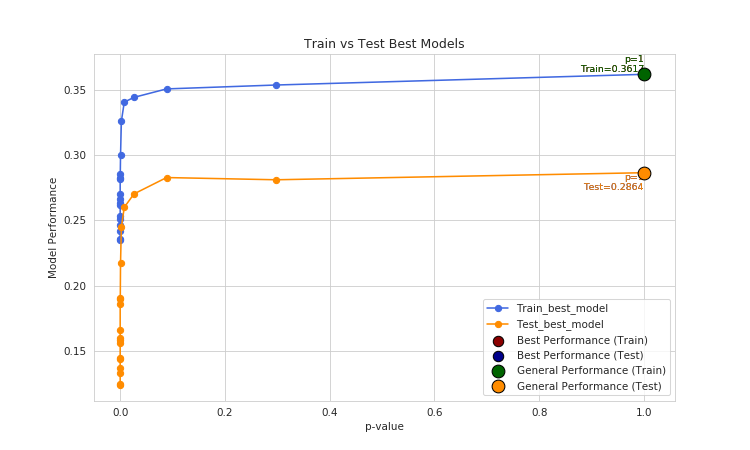

2. Reporting Generalized Performance:

clump_p1              1.000000
clump_r2              0.100000
clump_kb            200.000000
p_window_size       200.000000
p_slide_size         50.000000
p_LD_threshold        0.250000
pvalue                1.000000
Test_best_model       0.286401
Test_null_model       0.118692
Test_pure_prs         0.000001
Train_best_model      0.361699
Train_null_model      0.230010
Train_pure_prs        0.000001
l1weight              0.100000
numberofpca           6.000000
tempalpha             0.100000
Difference            0.075298
Sum                   0.648101
Name: 19, dtype: float64
3. Reporting the correlation of hyperparameters and the performance of 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs', 'Test_null_model', and 'Test_best_model':

3. For string hyperparameters, we used one-hot encoding to find the correlation between string hyperparameters and 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs',

<IPython.core.display.Javascript object>


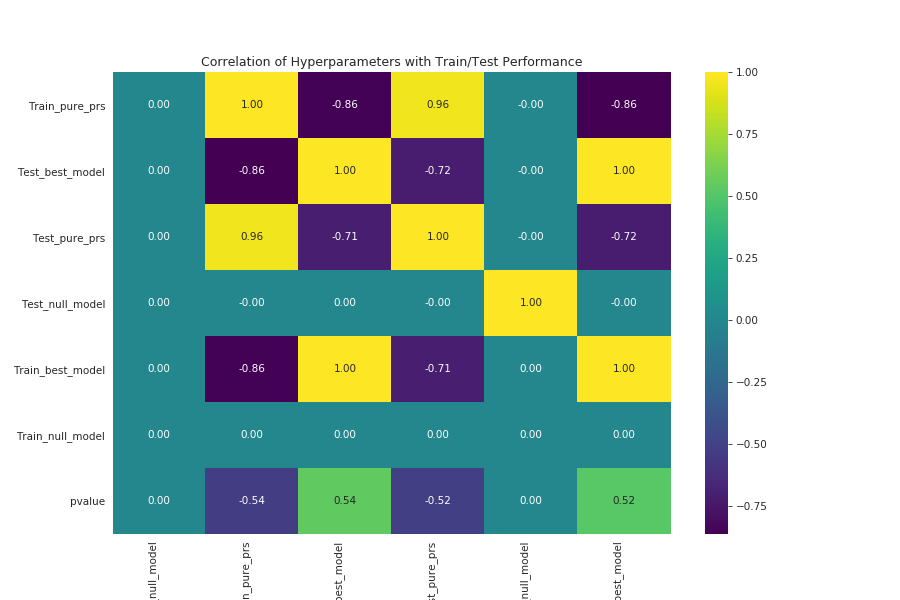

<IPython.core.display.Javascript object>


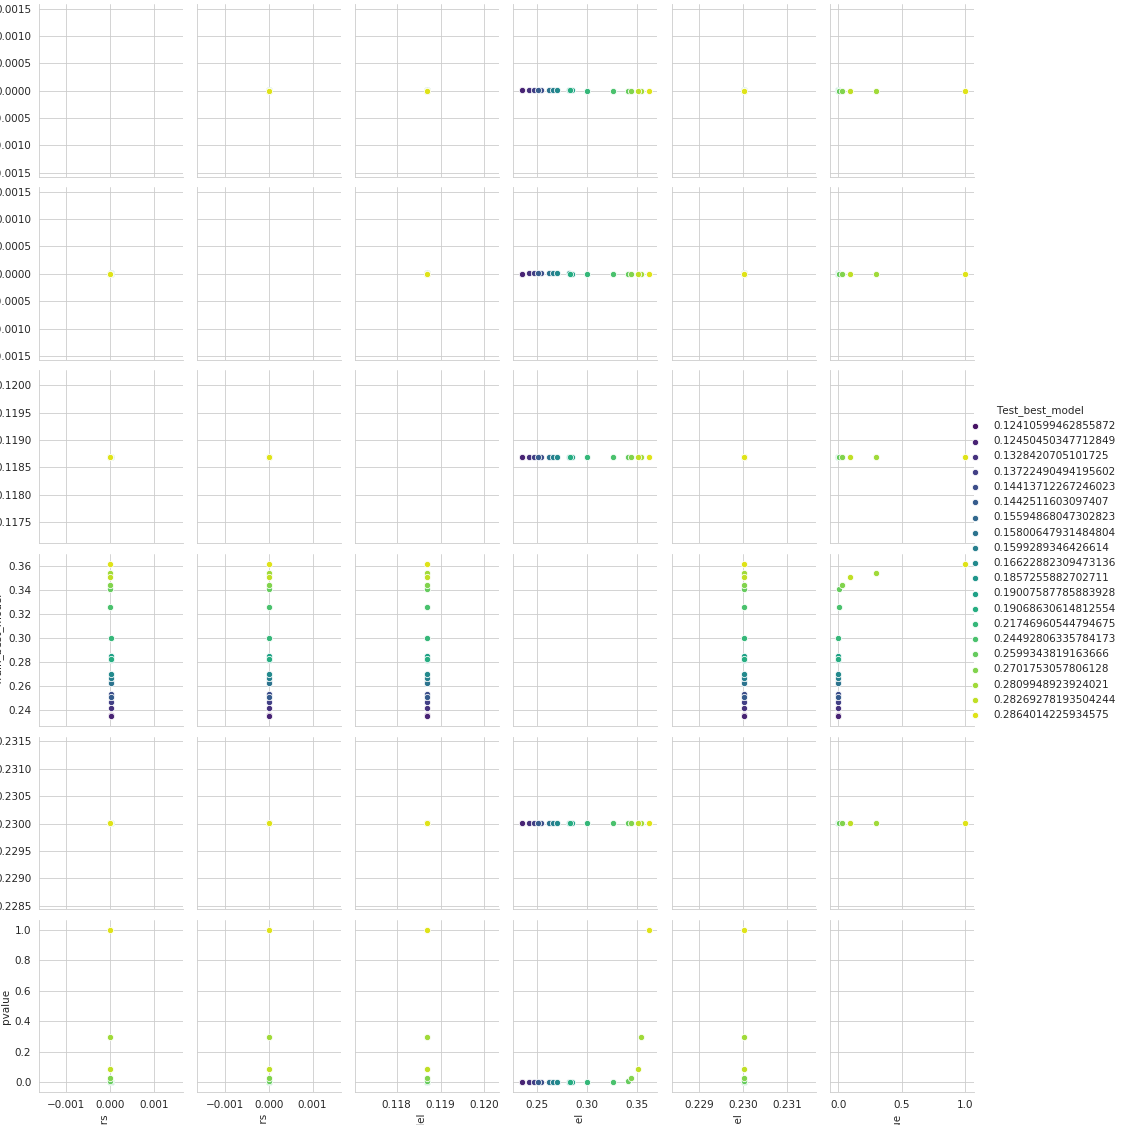

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# In Python 2, use 'plt.ion()' to enable interactive mode
plt.ion()

df = divided_result.sort_values(by='Train_best_model', ascending=False)
print("1. Reporting Based on Best Training Performance:\n")
print(df.iloc[0])

df = divided_result.copy()

# Plot Train and Test best models against p-values
plt.figure(figsize=(10, 6))
plt.plot(df['pvalue'], df['Train_best_model'], label='Train_best_model', marker='o', color='royalblue')
plt.plot(df['pvalue'], df['Test_best_model'], label='Test_best_model', marker='o', color='darkorange')

# Highlight the p-value where both train and test are high
best_index = df[['Train_best_model']].sum(axis=1).idxmax()
best_pvalue = df.loc[best_index, 'pvalue']
best_train = df.loc[best_index, 'Train_best_model']
best_test = df.loc[best_index, 'Test_best_model']

# Use dark colors for the circles
plt.scatter(best_pvalue, best_train, color='darkred', s=100, label='Best Performance (Train)', edgecolor='black', zorder=5)
plt.scatter(best_pvalue, best_test, color='darkblue', s=100, label='Best Performance (Test)', edgecolor='black', zorder=5)

# Annotate the best performance with p-value, train, and test values
plt.text(best_pvalue, best_train, 'p=%0.4g\nTrain=%0.4g' % (best_pvalue, best_train), ha='right', va='bottom', fontsize=9, color='darkred')
plt.text(best_pvalue, best_test, 'p=%0.4g\nTest=%0.4g' % (best_pvalue, best_test), ha='right', va='top', fontsize=9, color='darkblue')

# Calculate Difference and Sum
df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
df['Sum'] = df['Train_best_model'] + df['Test_best_model']

# Sort the DataFrame
sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])

# Highlight the general performance
general_index = sorted_df.index[0]
general_pvalue = sorted_df.loc[general_index, 'pvalue']
general_train = sorted_df.loc[general_index, 'Train_best_model']
general_test = sorted_df.loc[general_index, 'Test_best_model']

plt.scatter(general_pvalue, general_train, color='darkgreen', s=150, label='General Performance (Train)', edgecolor='black', zorder=6)
plt.scatter(general_pvalue, general_test, color='darkorange', s=150, label='General Performance (Test)', edgecolor='black', zorder=6)

# Annotate the general performance with p-value, train, and test values
plt.text(general_pvalue, general_train, 'p=%0.4g\nTrain=%0.4g' % (general_pvalue, general_train), ha='right', va='bottom', fontsize=9, color='darkgreen')
plt.text(general_pvalue, general_test, 'p=%0.4g\nTest=%0.4g' % (general_pvalue, general_test), ha='right', va='top', fontsize=9, color='darkorange')

# Add labels and legend
plt.xlabel('p-value')
plt.ylabel('Model Performance')
plt.title('Train vs Test Best Models')
plt.legend()
plt.show()

print("2. Reporting Generalized Performance:\n")
df = divided_result.copy()
df['Difference'] = abs(df['Train_best_model'] - df['Test_best_model'])
df['Sum'] = df['Train_best_model'] + df['Test_best_model']
sorted_df = df.sort_values(by=['Sum', 'Difference'], ascending=[False, True])
print(sorted_df.iloc[0])

print("3. Reporting the correlation of hyperparameters and the performance of 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs', 'Test_null_model', and 'Test_best_model':\n")

print("3. For string hyperparameters, we used one-hot encoding to find the correlation between string hyperparameters and 'Train_null_model', 'Train_pure_prs', 'Train_best_model', 'Test_pure_prs', 'Test_null_model', and 'Test_best_model'.")

print("3. We performed this analysis for those hyperparameters that have more than one unique value.")

correlation_columns = [
    'Train_null_model', 'Train_pure_prs', 'Train_best_model',
    'Test_pure_prs', 'Test_null_model', 'Test_best_model'
]

hyperparams = [col for col in divided_result.columns if len(divided_result[col].unique()) > 1]
hyperparams = list(set(hyperparams + correlation_columns))

# Separate numeric and string columns
numeric_hyperparams = [col for col in hyperparams if pd.api.types.is_numeric_dtype(divided_result[col])]
string_hyperparams = [col for col in hyperparams if pd.api.types.is_string_dtype(divided_result[col])]

# Encode string columns using one-hot encoding
divided_result_encoded = pd.get_dummies(divided_result, columns=string_hyperparams)

# Combine numeric hyperparams with the new one-hot encoded columns
encoded_columns = [col for col in divided_result_encoded.columns if col.startswith(tuple(string_hyperparams))]
hyperparams = numeric_hyperparams + encoded_columns

# Calculate correlations
correlations = divided_result_encoded[hyperparams].corr()

# Display correlation of hyperparameters with train/test performance columns
hyperparam_correlations = correlations.loc[hyperparams, correlation_columns]
hyperparam_correlations = hyperparam_correlations.fillna(0)

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(hyperparam_correlations, annot=True, cmap='viridis', fmt='.2f', cbar=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Rotate y-axis labels to horizontal
#ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va='center')

plt.title('Correlation of Hyperparameters with Train/Test Performance')
plt.show()

sns.set_style("whitegrid")  # Choose your preferred style
pairplot = sns.pairplot(divided_result_encoded[hyperparams], hue='Test_best_model', palette='viridis')

# Adjust the figure size
pairplot.fig.set_size_inches(15, 15)  # You can adjust the size as needed

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, ha='right')  # X-axis labels vertical
    #ax.set_ylabel(ax.get_ylabel(), rotation=0, va='bottom')  # Y-axis labels horizontal

# Show the plot
plt.show()
